# Análise de resultados método 6

In [2]:
import pandas as pd

In [3]:
results = pd.read_csv("..\\method6_detailed_results_20250914_015102.csv")
results.describe()

,stint_accuracy,stint1_compound_accuracy,stint2_compound_accuracy,stint3_compound_accuracy,stint1_length_mae,stint2_length_mae,stint3_length_mae
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,0.804622,0.710434,0.696691,0.560380,5.838804,6.982974,5.901008
std,0.065921,0.036890,0.036897,0.057098,0.402581,0.840222,0.434149
min,0.669468,0.627451,0.599440,0.370370,5.229692,5.876751,5.050360
25%,0.792717,0.706583,0.688375,0.542373,5.493697,6.245098,5.593525
50%,0.829132,0.718487,0.708683,0.562072,5.703081,6.677871,5.821976
75%,0.855042,0.733894,0.717087,0.597997,6.123950,7.518908,6.263026
max,0.857143,0.753501,0.742297,0.641379,6.941176,8.991597,6.851852


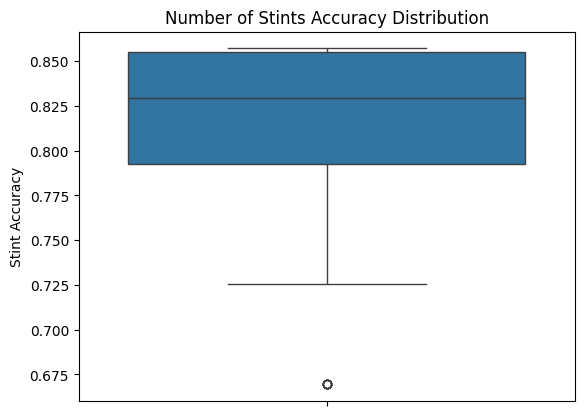

In [4]:
# plot stint_accuracy vertical box plot with seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(y=results["stint_accuracy"])
plt.title("Number of Stints Accuracy Distribution")
plt.ylabel("Stint Accuracy")
plt.show()

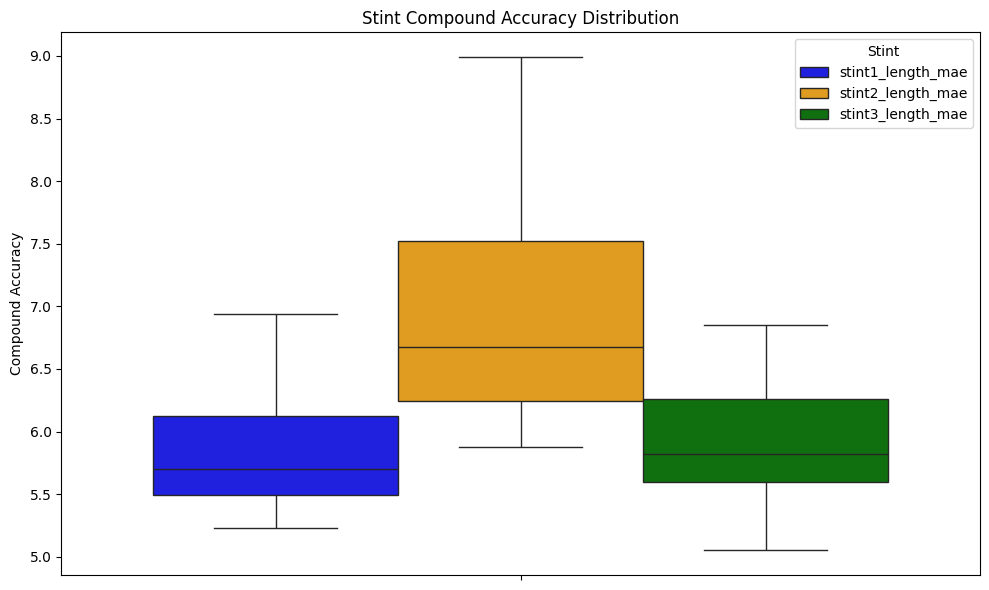

In [5]:
# Restructure data for side-by-side boxplots
melted_data = pd.melt(
    results, 
    value_vars=["stint1_length_mae", "stint2_length_mae", "stint3_length_mae"],
    var_name="Stint", 
    value_name="Compound Accuracy"
)

# Clean up stint labels for better readability
melted_data["Stint"] = melted_data["Stint"].str.replace("_compound_accuracy", "")

# Create the plot
plt.figure(figsize=(10, 6))
sns.boxplot(hue="Stint", y="Compound Accuracy", data=melted_data, palette=["blue", "orange", "green"])
plt.title("Stint Compound Accuracy Distribution")
plt.tight_layout()
plt.show()


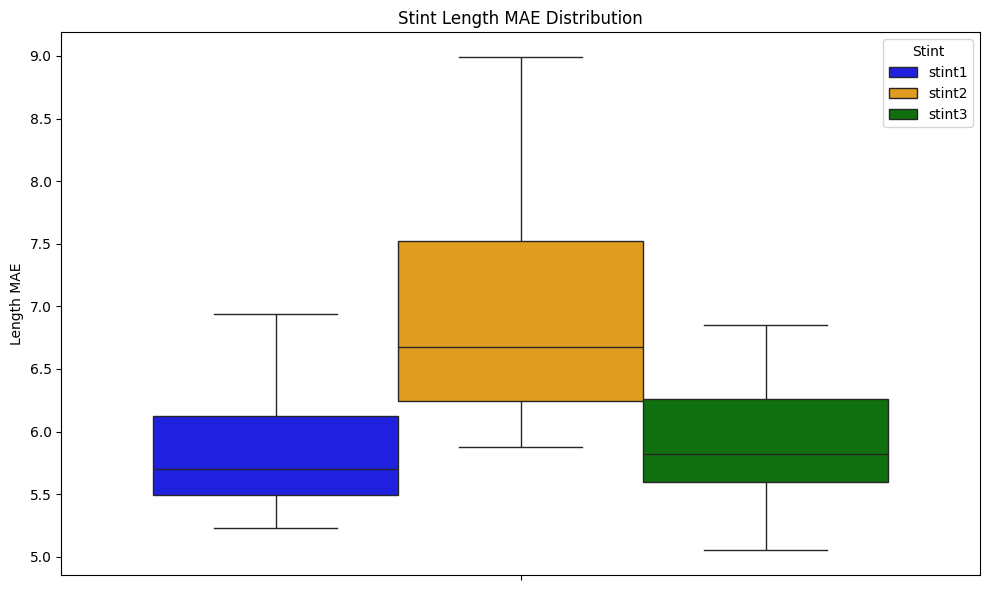

In [6]:
melted_data = pd.melt(
    results,
    value_vars=["stint1_length_mae", "stint2_length_mae", "stint3_length_mae"],
    var_name="Stint",
    value_name="Length MAE"
)
melted_data["Stint"] = melted_data["Stint"].str.replace("_length_mae", "")
plt.figure(figsize=(10, 6))
sns.boxplot(hue="Stint", y="Length MAE", data=melted_data, palette=["blue", "orange", "green"])
plt.title("Stint Length MAE Distribution")
plt.tight_layout()
plt.show()

C:\Users\rafam\AppData\Local\Temp\ipykernel_55776\1903916926.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='classifier', y='stint_accuracy', data=classifier_means, palette='viridis')


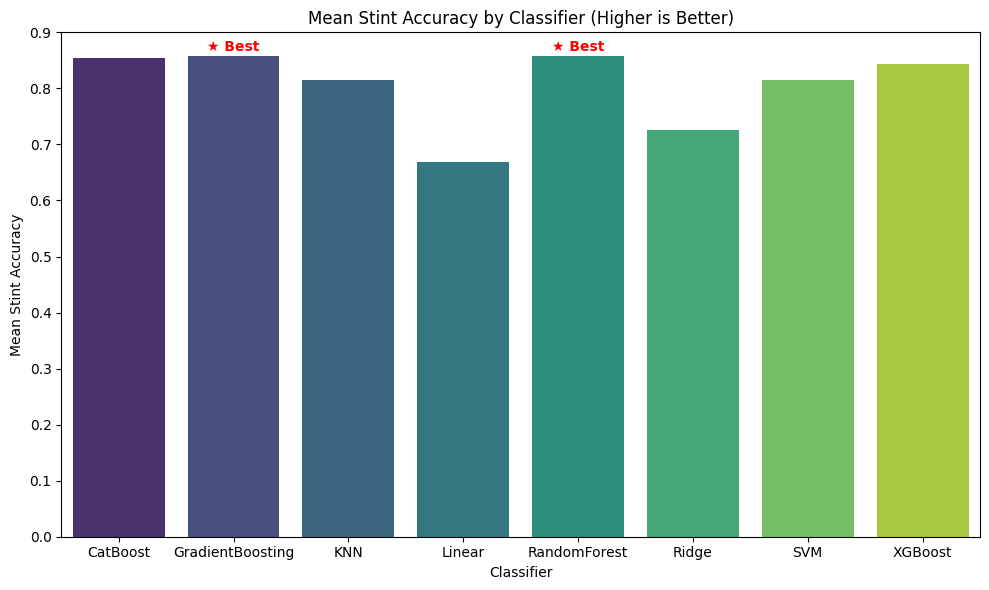

In [7]:
# Calculate mean stint_accuracy for each classifier
classifier_means = results.groupby('classifier')['stint_accuracy'].mean().reset_index()

# Find the best performer(s)
max_accuracy = classifier_means['stint_accuracy'].max()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='classifier', y='stint_accuracy', data=classifier_means, palette='viridis')
plt.title('Mean Stint Accuracy by Classifier (Higher is Better)')
plt.ylabel('Mean Stint Accuracy')
plt.xlabel('Classifier')

# Add text labels for the best performer(s)
for i, row in classifier_means.iterrows():
    if row['stint_accuracy'] == max_accuracy:
        plt.text(
            i,  # Index position in the plot
            row['stint_accuracy'] + 0.01,  # Just above the bar
            '★ Best',
            ha='center',
            fontweight='bold',
            color='red'
        )

plt.tight_layout()
plt.show()

C:\Users\rafam\AppData\Local\Temp\ipykernel_55776\1747029943.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='regressor', y='mean_length_mae', data=classifier_length_means, palette='viridis')


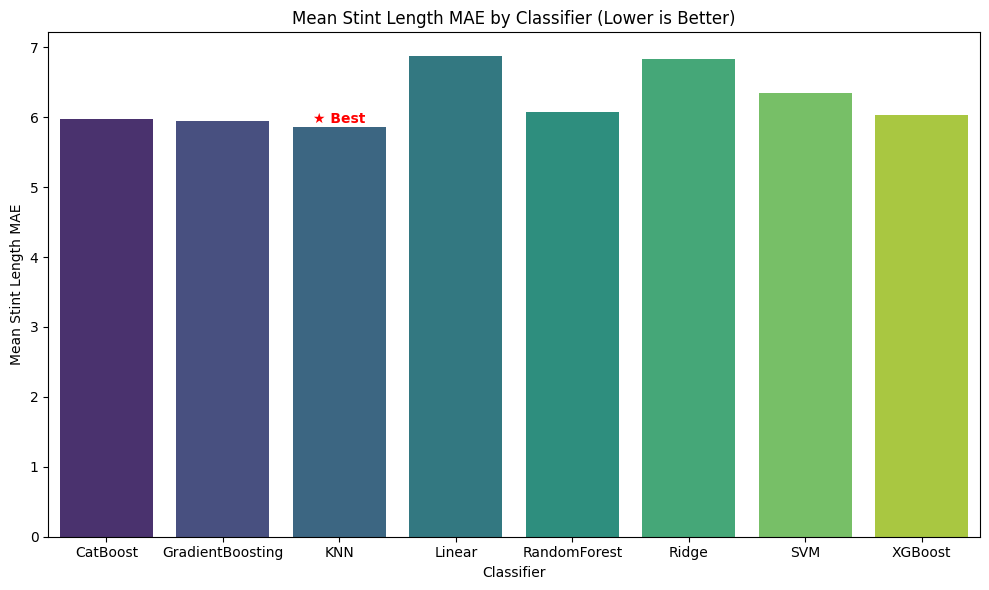

In [8]:
classifier_length_means = results.groupby('regressor')[['stint1_length_mae', 'stint2_length_mae', 'stint3_length_mae']].mean().reset_index()

# Calculate the overall mean across all three stint length MAEs
classifier_length_means['mean_length_mae'] = classifier_length_means[['stint1_length_mae', 'stint2_length_mae', 'stint3_length_mae']].mean(axis=1)

# Find the best performer (lowest MAE)
min_mae = classifier_length_means['mean_length_mae'].min()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='regressor', y='mean_length_mae', data=classifier_length_means, palette='viridis')
plt.title('Mean Stint Length MAE by Classifier (Lower is Better)')
plt.ylabel('Mean Stint Length MAE')
plt.xlabel('Classifier')

# Add text labels for the best performer(s)
for i, row in classifier_length_means.iterrows():
    if row['mean_length_mae'] == min_mae:
        plt.text(
            i,  # Index position in the plot
            row['mean_length_mae'] + 0.05,  # Just below the bar
            '★ Best',
            ha='center',
            fontweight='bold',
            color='red'
        )

plt.tight_layout()
plt.show()

C:\Users\rafam\AppData\Local\Temp\ipykernel_55776\1317116328.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='classifier', y='mean_compound_accuracy', data=classifier_compound_means, palette='viridis')


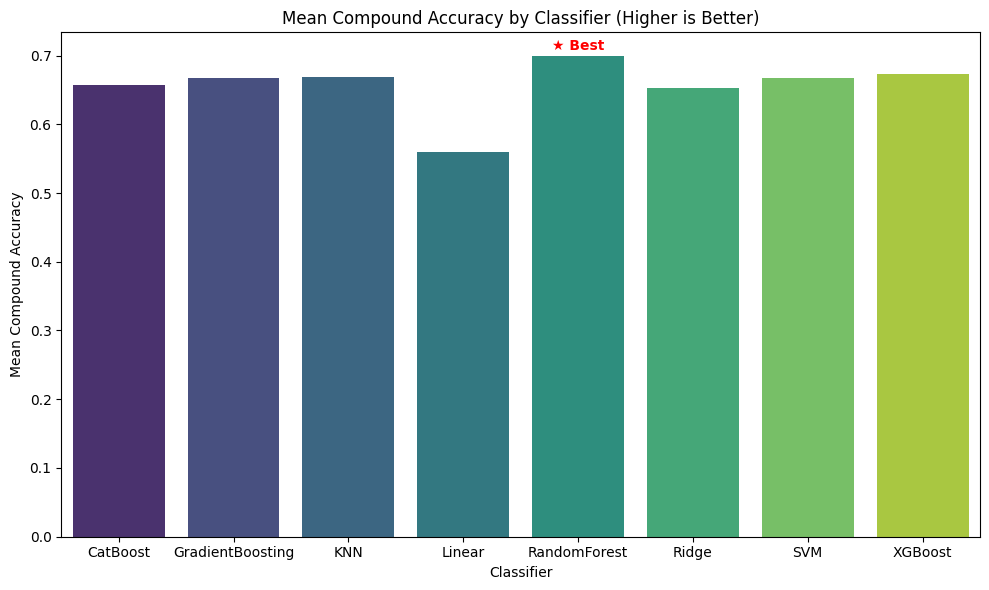

In [9]:
# Group by classifier and calculate mean of compound accuracies
classifier_compound_means = results.groupby('classifier')[['stint1_compound_accuracy', 'stint2_compound_accuracy', 'stint3_compound_accuracy']].mean().reset_index()

# Calculate the overall mean across all three stint compound accuracies
classifier_compound_means['mean_compound_accuracy'] = classifier_compound_means[['stint1_compound_accuracy', 'stint2_compound_accuracy', 'stint3_compound_accuracy']].mean(axis=1)

# Find the best performer (highest compound accuracy)
max_compound_accuracy = classifier_compound_means['mean_compound_accuracy'].max()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='classifier', y='mean_compound_accuracy', data=classifier_compound_means, palette='viridis')
plt.title('Mean Compound Accuracy by Classifier (Higher is Better)')
plt.ylabel('Mean Compound Accuracy')
plt.xlabel('Classifier')

# Add text labels for the best performer(s)
for i, row in classifier_compound_means.iterrows():
    if row['mean_compound_accuracy'] == max_compound_accuracy:
        plt.text(
            i,  # Index position in the plot
            row['mean_compound_accuracy'] + 0.01,  # Just above the bar
            '★ Best',
            ha='center',
            fontweight='bold',
            color='red'
        )

plt.tight_layout()
plt.show()

In [12]:
hyperparams = pd.read_csv("..\\extracted_hyperparameters.csv", index_col=0)
hyperparams

,classifier_type,regressor_type,stint_classifier_max_depth,stint_classifier_n_estimators,compound_clf_1_max_depth,compound_clf_1_n_estimators,stint_len_reg_1_max_depth,stint_len_reg_1_n_estimators,compound_clf_2_max_depth,compound_clf_2_n_estimators,...,stint_classifier_weights,compound_clf_1_algorithm,compound_clf_1_n_neighbors,compound_clf_1_weights,compound_clf_2_algorithm,compound_clf_2_n_neighbors,compound_clf_2_weights,compound_clf_3_algorithm,compound_clf_3_n_neighbors,compound_clf_3_weights
combination_number,,,,,,,,,,,,,,,,,,,,,
1,RandomForest,RandomForest,20.0,300.0,10.0,50.0,20.0,500.0,20.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RandomForest,XGBoost,20.0,300.0,10.0,50.0,6.0,300.0,20.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RandomForest,CatBoost,20.0,300.0,10.0,50.0,NaN,NaN,20.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RandomForest,SVM,20.0,300.0,10.0,50.0,NaN,NaN,20.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,RandomForest,Linear,20.0,300.0,10.0,50.0,NaN,NaN,20.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,KNN,SVM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,distance,auto,5.0,distance,auto,5.0,distance,auto,7.0,distance
61,KNN,Linear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,distance,auto,5.0,distance,auto,5.0,distance,auto,7.0,distance
62,KNN,Ridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,distance,auto,5.0,distance,auto,5.0,distance,auto,7.0,distance


In [14]:
hyperparams_rf_clf = hyperparams[(hyperparams['classifier_type'] == 'RandomForest')]
hyperparams_rf_clf

,classifier_type,regressor_type,stint_classifier_max_depth,stint_classifier_n_estimators,compound_clf_1_max_depth,compound_clf_1_n_estimators,stint_len_reg_1_max_depth,stint_len_reg_1_n_estimators,compound_clf_2_max_depth,compound_clf_2_n_estimators,...,stint_classifier_weights,compound_clf_1_algorithm,compound_clf_1_n_neighbors,compound_clf_1_weights,compound_clf_2_algorithm,compound_clf_2_n_neighbors,compound_clf_2_weights,compound_clf_3_algorithm,compound_clf_3_n_neighbors,compound_clf_3_weights
combination_number,,,,,,,,,,,,,,,,,,,,,
1,RandomForest,RandomForest,20.0,300.0,10.0,50.0,20.0,500.0,20.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RandomForest,XGBoost,20.0,300.0,10.0,50.0,6.0,300.0,20.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RandomForest,CatBoost,20.0,300.0,10.0,50.0,NaN,NaN,20.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RandomForest,SVM,20.0,300.0,10.0,50.0,NaN,NaN,20.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,RandomForest,Linear,20.0,300.0,10.0,50.0,NaN,NaN,20.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,RandomForest,Ridge,20.0,300.0,10.0,50.0,NaN,NaN,20.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,RandomForest,GradientBoosting,20.0,300.0,10.0,50.0,6.0,500.0,20.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,RandomForest,KNN,20.0,300.0,10.0,50.0,NaN,NaN,20.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
hyperparams_rf_reg = hyperparams.loc[(hyperparams['regressor_type'] == 'RandomForest')]
hyperparams_rf_reg

,classifier_type,regressor_type,stint_classifier_max_depth,stint_classifier_n_estimators,compound_clf_1_max_depth,compound_clf_1_n_estimators,stint_len_reg_1_max_depth,stint_len_reg_1_n_estimators,compound_clf_2_max_depth,compound_clf_2_n_estimators,...,stint_classifier_weights,compound_clf_1_algorithm,compound_clf_1_n_neighbors,compound_clf_1_weights,compound_clf_2_algorithm,compound_clf_2_n_neighbors,compound_clf_2_weights,compound_clf_3_algorithm,compound_clf_3_n_neighbors,compound_clf_3_weights
combination_number,,,,,,,,,,,,,,,,,,,,,
1,RandomForest,RandomForest,20.0,300.0,10.0,50.0,20.0,500.0,20.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,XGBoost,RandomForest,10.0,100.0,6.0,100.0,20.0,500.0,10.0,300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,CatBoost,RandomForest,NaN,NaN,NaN,NaN,20.0,500.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,SVM,RandomForest,NaN,NaN,NaN,NaN,20.0,500.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Linear,RandomForest,NaN,NaN,NaN,NaN,20.0,500.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Ridge,RandomForest,NaN,NaN,NaN,NaN,20.0,500.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,GradientBoosting,RandomForest,10.0,500.0,3.0,300.0,20.0,500.0,6.0,500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,KNN,RandomForest,NaN,NaN,NaN,NaN,20.0,500.0,NaN,NaN,...,distance,auto,5.0,distance,auto,5.0,distance,auto,7.0,distance


In [21]:
# display only stint_length* columns
stint_length_cols = [col for col in hyperparams_rf_reg.columns if 'stint_len' in col]
hyperparams_rf_reg[['classifier_type', 'regressor_type'] + stint_length_cols]

,classifier_type,regressor_type,stint_len_reg_1_max_depth,stint_len_reg_1_n_estimators,stint_len_reg_2_max_depth,stint_len_reg_2_n_estimators,stint_len_reg_3_max_depth,stint_len_reg_3_n_estimators,stint_len_reg_1_learning_rate,stint_len_reg_1_reg_alpha,...,stint_len_reg_3_alpha,stint_len_reg_1_algorithm,stint_len_reg_1_n_neighbors,stint_len_reg_1_weights,stint_len_reg_2_algorithm,stint_len_reg_2_n_neighbors,stint_len_reg_2_weights,stint_len_reg_3_algorithm,stint_len_reg_3_n_neighbors,stint_len_reg_3_weights
combination_number,,,,,,,,,,,,,,,,,,,,,
1,RandomForest,RandomForest,20.0,500.0,NaN,500.0,20.0,500.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,XGBoost,RandomForest,20.0,500.0,NaN,500.0,20.0,500.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,CatBoost,RandomForest,20.0,500.0,NaN,500.0,20.0,500.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,SVM,RandomForest,20.0,500.0,NaN,500.0,20.0,500.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Linear,RandomForest,20.0,500.0,NaN,500.0,20.0,500.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Ridge,RandomForest,20.0,500.0,NaN,500.0,20.0,500.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,GradientBoosting,RandomForest,20.0,500.0,NaN,500.0,20.0,500.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,KNN,RandomForest,20.0,500.0,NaN,500.0,20.0,500.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
